# 데이터 시각화

In [1]:
import pandas as pd

In [2]:
# df_final.csv 파일 불러오기
df_final = pd.read_csv('df_final.csv')

In [3]:
# 데이터 시각화
# df_final안에 도로명주소를 기준으로 정렬
df_final = df_final.sort_values(by='도로명')
df_final

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명,비고,lng,lat
5964,경상남도 창원마산회원구 회원동,3*,단독,8m미만,64.76,106.7,201609,23,"16,900",NaN,3.15대로,4. 마산회원구_단독다가구(매매),128.567243,35.198708
5768,경상남도 창원마산회원구 합성동,1**,단독,8m미만,104.36,114.6,201610,15,"29,900",1979.0,3.15대로,4. 마산회원구_단독다가구(매매),128.567243,35.198708
6594,경상남도 창원마산합포구 중앙동3가,*,단독,25m이상,688.85,181.8,201609,30,"89,000",1991.0,3.15대로,3. 마산합포구_단독다가구(매매),128.567243,35.198708
6590,경상남도 창원마산합포구 중앙동2가,*,단독,8m미만,62.18,66.1,201609,9,"12,400",1990.0,3.15대로,3. 마산합포구_단독다가구(매매),128.567243,35.198708
6507,경상남도 창원마산합포구 월남동5가,*,단독,8m미만,43.10,33.1,201611,1,"9,000",1990.0,3.15대로,3. 마산합포구_단독다가구(매매),128.567243,35.198708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,경상남도 창원의창구 명서동,1**,단독,12m미만,243.86,267.5,201710,21,"29,700",1991.0,NaN,1. 의창구_단독다가구(매매),NaN,NaN
11089,경상남도 창원의창구 명서동,6*,단독,12m미만,359.89,274.4,201709,28,"38,200",1992.0,NaN,1. 의창구_단독다가구(매매),NaN,NaN
11144,경상남도 창원의창구 북면 동전리,4**,단독,8m미만,37.68,119.0,201707,17,"10,000",1960.0,NaN,1. 의창구_단독다가구(매매),NaN,NaN
11255,경상남도 창원의창구 신월동,6*,단독,12m미만,196.76,241.6,201802,1,"34,750",1988.0,NaN,1. 의창구_단독다가구(매매),NaN,NaN


In [4]:
# df_final에 na drop
df_final = df_final.dropna()

In [ ]:
# '계약년월' 컬럼과 '계약일'컬럼을 합쳐서 '계약년월일'컬럼 생성
df_main = df_final.copy()
df_main['계약년월일'] = df_main['계약년월'].astype(str) + df_main['계약일'].astype(str).str.zfill(2)

In [6]:
# 같은 'lng', 'lat', '주택유형' 값을 가지는 행들을 그룹한 데이터프레임을 개별생성
grouped = df_main.groupby(['lng', 'lat', '주택유형'])
grouped_dfs = [group for _, group in grouped]
# 데이터프레임 하나 테스트 출력
grouped_dfs[0]

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명,비고,lng,lat,계약년월일
9791,경상남도 창원진해구 대장동,6*,단독,8m미만,81.93,587.0,201901,30,"26,000",1995.0,대장로,5. 진해구_단독다가구(매매),126.789842,37.542001,20190130
1218,경상남도 창원진해구 대장동,1**,단독,12m미만,75.90,426.0,201704,26,"32,250",1900.0,대장로,5. 진해구_단독다가구(매매),126.789842,37.542001,20170426


In [7]:
# 한글폰트 다운로드
# if u need .'sudo apt-get install fonts-nanum*'
# !apt-get install -y fonts-nanum
# !fc-cache -fv

In [8]:
# grouped_dfs 리스트 안에 있는 각 데이터프레임이 가지고있는 '거래금액(만원)' 컬럼의 값을 '계약년월'컬럼값을 기준으로 시계열 그래프로 시각화
# matplotlib, seaborn 라이브러리 사용
# 기대하는 시각화를 표현하자면, Grid형태로 각 데이터프레임이 위치해있고, 각 그래프는 '계약년월'을 x축으로, '거래금액(만원)'을 y축으로 하는 선그래프
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]

print(font_list)

['NanumGothic Eco', 'NanumMyeongjo', 'NanumSquare', 'NanumMyeongjo', 'NanumSquareRound', 'NanumGothicCoding', 'Nanum Pen Script', 'NanumGothic Eco', 'NanumGothicCoding', 'NanumSquare_ac', 'NanumSquareRound', 'NanumGothic', 'NanumBarunpen', 'Nanum Brush Script', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumBarunGothic', 'NanumMyeongjo', 'NanumGothic', 'NanumBarunGothic', 'NanumGothic Eco', 'NanumSquare', 'NanumGothic', 'NanumSquareRound', 'NanumSquare', 'NanumGothic', 'NanumSquareRound', 'NanumMyeongjo YetHangul', 'NanumBarunGothic', 'NanumSquare', 'NanumBarunGothic YetHangul', 'NanumSquare_ac', 'NanumBarunpen', 'NanumMyeongjo Eco', 'NanumMyeongjo Eco', 'NanumSquare_ac', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumMyeongjo Eco']


In [10]:
# Linux 환경에서 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family=fontprop.get_name())

In [18]:
# grouped_dfs 리스트 안에있는 각 데이터프레임이 가지고있는 '도로명' 컬럼 값을 단순출력
len(grouped_dfs)

2829

In [ ]:
for group in grouped_dfs:
    print(group['도로명'].values[0])

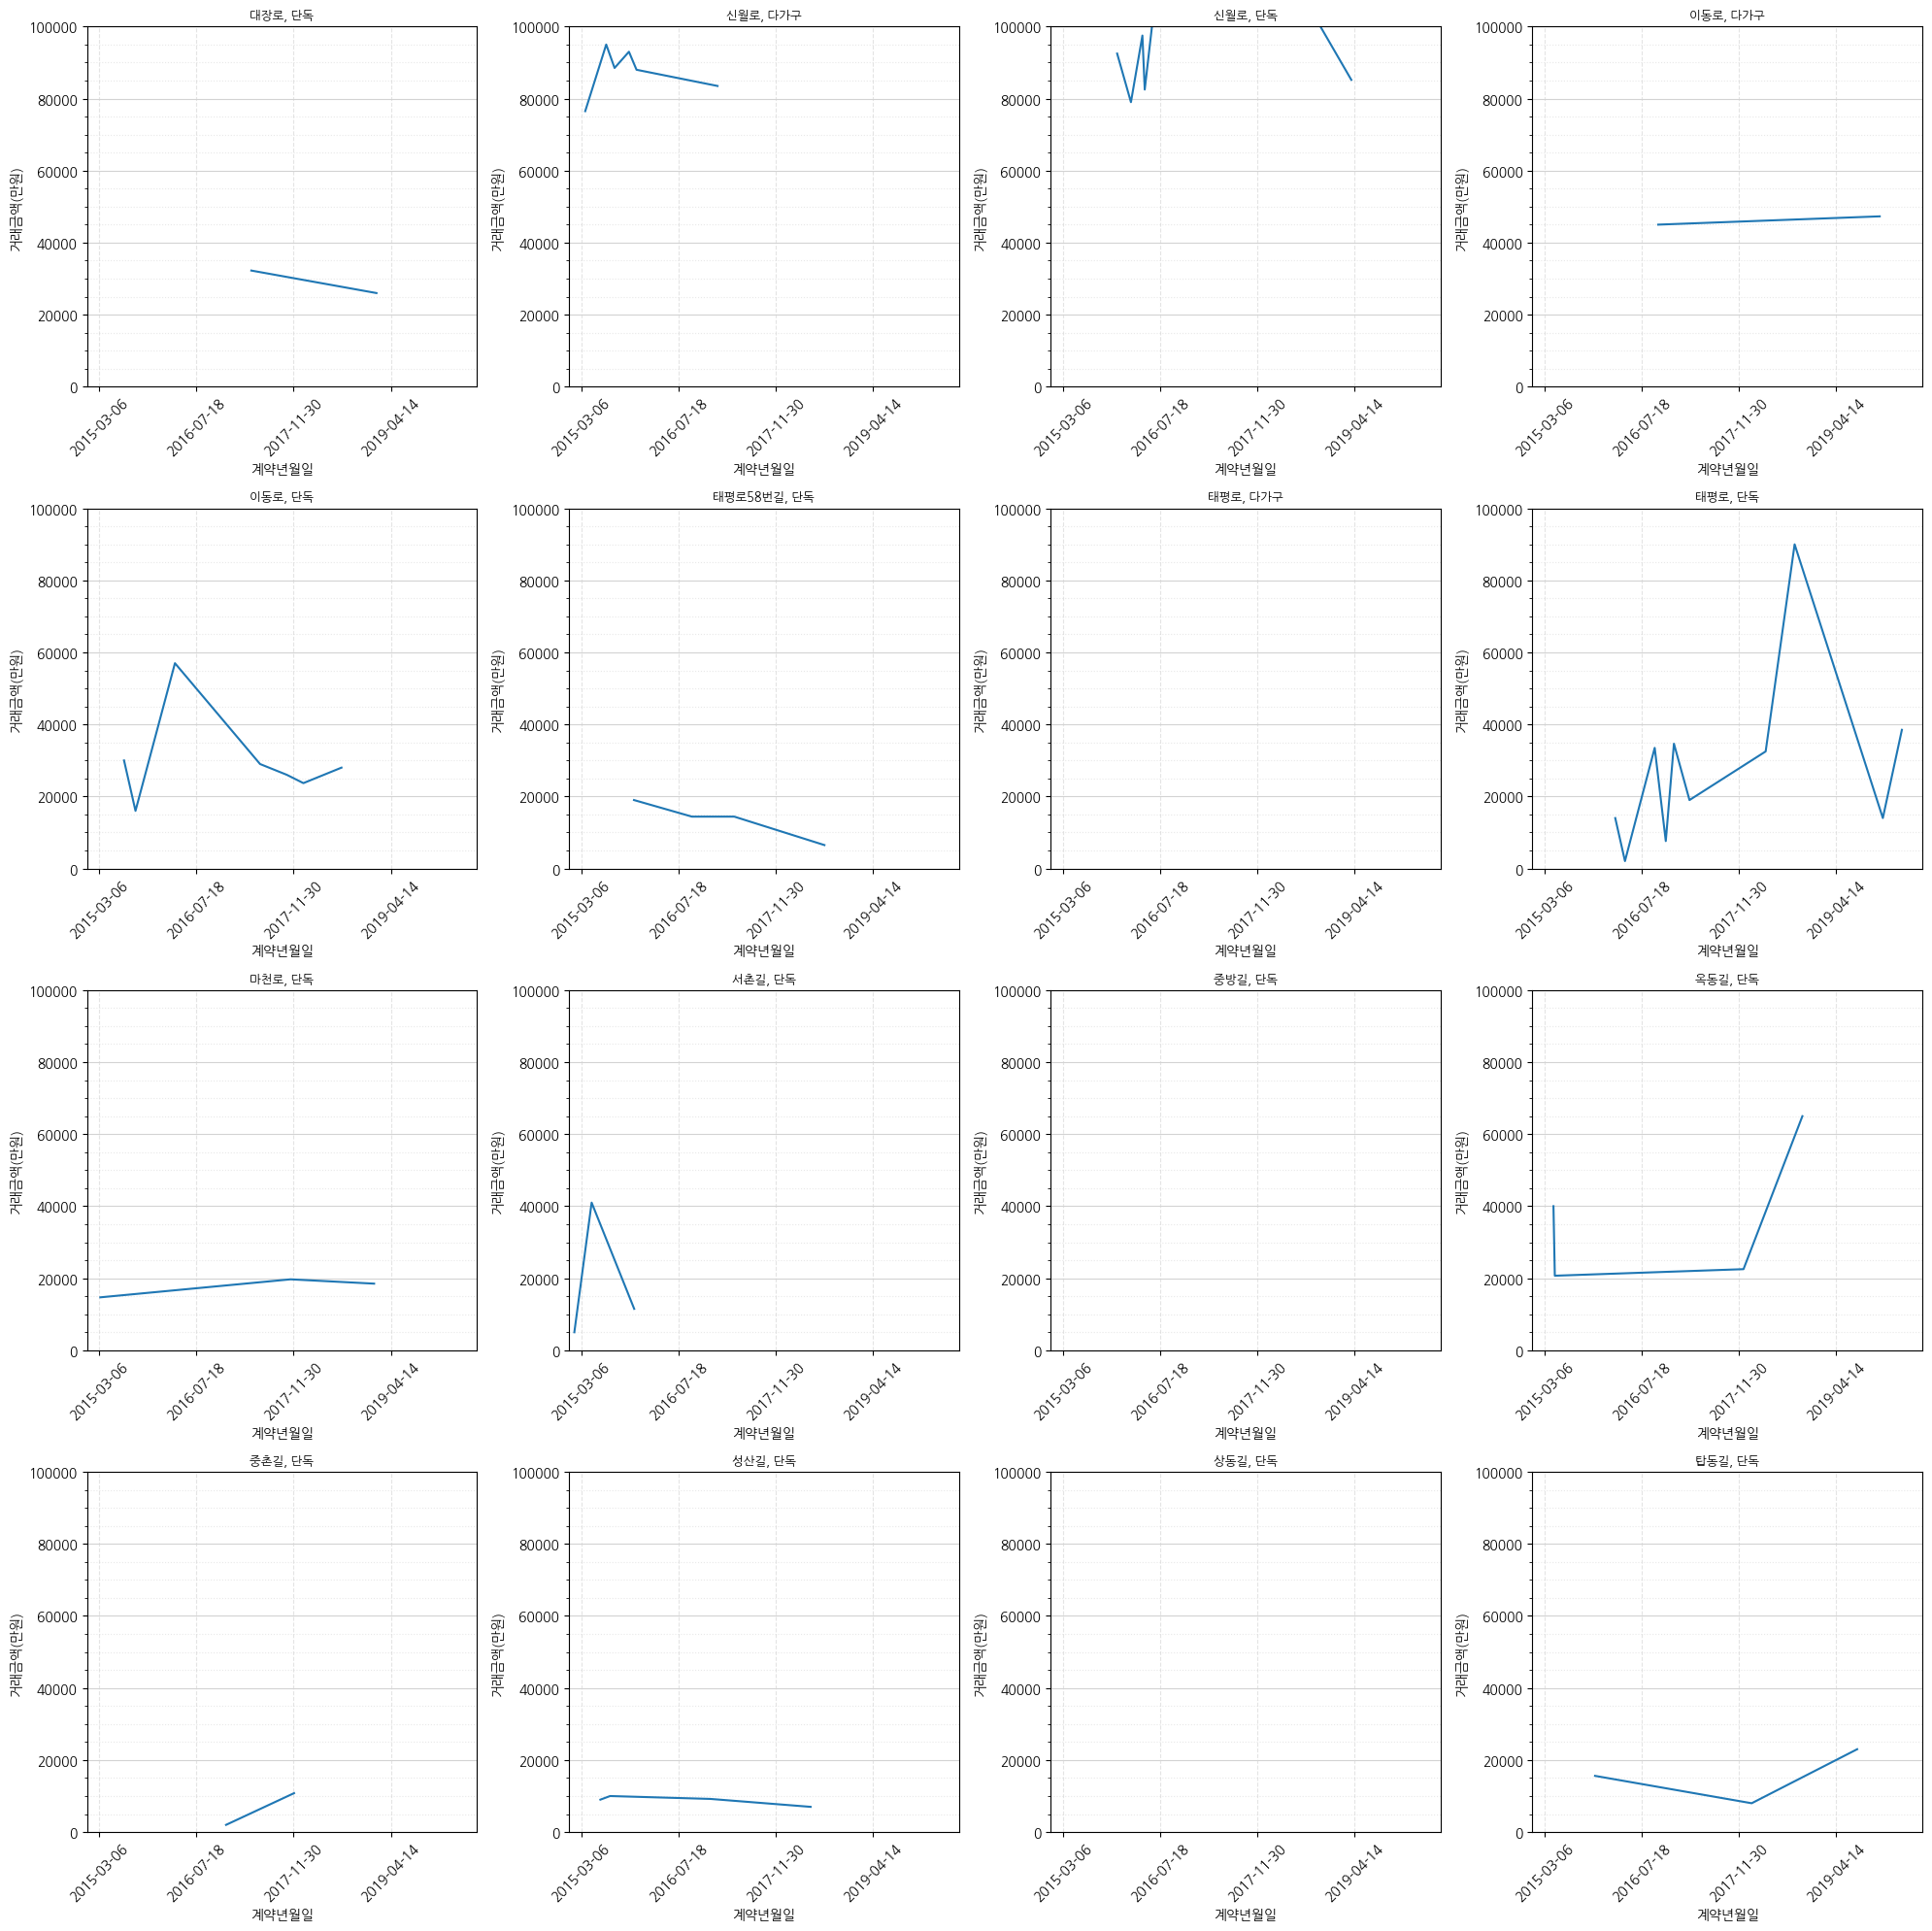

In [ ]:
import matplotlib.ticker as mticker

# 타입 정리(한번만 실행)
df_main['계약년월일'] = pd.to_datetime(df_main['계약년월일'], format='%Y%m%d', errors='coerce')
df_main['거래금액(만원)'] = pd.to_numeric(df_main['거래금액(만원)'].astype(str).str.replace(',', ''), errors='coerce')

# 그룹 재생성
grouped = df_main.groupby(['lng', 'lat', '주택유형'])
grouped_dfs = [group for _, group in grouped]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

x_min = df_main['계약년월일'].min()
x_max = df_main['계약년월일'].max()

for ax, group in zip(axes, grouped_dfs):
    g = group.dropna(subset=['계약년월일', '거래금액(만원)']).sort_values(by=['계약년월일', '거래금액(만원)'])
    if g.empty:
        ax.set_axis_off()
        continue

    sns.lineplot(data=g, x='계약년월일', y='거래금액(만원)', ax=ax)

    ax.set_title(f"{g['도로명'].values[0]}, {g['주택유형'].values[0]}", fontsize=9)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, 100000)

    # y축에 규칙적인 major ticks 설정(예: 20000 간격) + minor ticks
    ax.yaxis.set_major_locator(mticker.MultipleLocator(20000))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(4))

    # 그리드 눈에 잘 띄게 설정 (major/minor 구분)
    ax.grid(which='major', axis='y', linestyle='-', color='lightgray', linewidth=0.8)
    ax.grid(which='minor', axis='y', linestyle=':', color='lightgray', alpha=0.5)

    # x축 그리드(원하면)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
    ax.grid(which='major', axis='x', linestyle='--', color='lightgray', alpha=0.6)

    ax.tick_params(axis='x', labelrotation=45)

# 남은 서브플롯 비활성화
for ax in axes[len(grouped_dfs):]:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# ...existing code...